In [223]:
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
#import community as community_louvain #Para louvain
#import networkx# as nx #Para grafos

In [224]:
stock_data = pd.read_csv(r"C:\Users\martu\Documents\martu\UCEMA\2 - PRIMER CUATRI\INFORMATICA\segunda parte\dataset_clustering_teorico.csv")
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [225]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [226]:
stock_data.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [227]:
stock_data.drop_duplicates(inplace=True)
stock_data.info()#no hay duplicados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.3+ KB


In [228]:
stock_data.dropna(inplace=True)
stock_data.info() #no hay Nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.3+ KB


In [229]:
stock_data= stock_data.set_index('Unnamed: 0')
#Normalizar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_data_normalizado = scaler.fit_transform(stock_data)
stock_data_normalizado

array([[ 0.4496197 , -0.38038084, -1.30603921, ..., -2.51168159,
         0.61220263, -5.74259972],
       [-1.36172667, -0.92679173,  0.04971049, ...,  0.02078649,
        -0.74336873,  0.11144388],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       ...,
       [ 0.22691503,  0.19145242,  0.38017522, ..., -0.08394087,
         0.1311819 ,  0.05940875],
       [-0.27788708, -0.0881048 ,  0.1047883 , ...,  0.02554728,
        -0.28422918, -0.08802742],
       [-0.17395902, -0.08810353,  0.13868208, ...,  0.01126587,
        -0.02186716, -0.05044645]])

In [230]:
from sklearn.cluster import KMeans
k = 14  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones.
kmeans.fit(stock_data_normalizado)  #aplicamos el método a nuestros datos. 
print(kmeans.labels_)

[10  8 12  8 11  0  7  0 11  5 11  0 11  0  0  0  0  6  2  0  0  0  9 11
  0  3  8  3 13 11  4  3 11  0  0 11 11  7  3  0  1  3  7  7 11  0  0  0
  0  7  0  0  0  0  0  8  0 11  0  0]


In [231]:
kmeans.cluster_centers_

array([[-0.03519481, -0.04411763,  0.1601917 , ...,  0.01749126,
        -0.21107052, -0.04455313],
       [-0.39666666, -0.08810734,  0.10055116, ..., -0.22199043,
         0.99479851,  0.20973409],
       [ 4.0871521 ,  3.88930315, -0.335835  , ...,  1.03473179,
        -0.90734745, -0.06779294],
       ...,
       [ 0.60078927,  0.24806402,  0.35167417, ...,  0.26875623,
        -0.06062064,  0.11144396],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       [-0.58967421, -0.73618107,  0.13021033, ...,  0.1302737 ,
         0.3388869 , -0.01286461]])

C:\Users\martu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


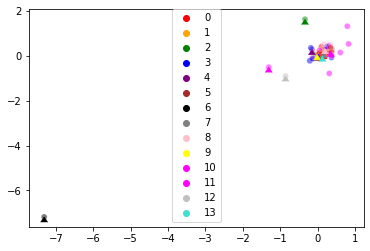

In [232]:
colores = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'black', 'grey', 'pink', 'yellow', 'magenta', 'fuchsia', 'silver', 'turquoise']
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0,1,2,3,4,5,6,7,8,9,10,11,12,13], legend = False, marker=6, s=50) #el s es para el tamaño de los centroides.

In [233]:
#esta no es una buena cantidad de clusters.Los clusters estan muy cerca unos de los otros, con lo cual habria que utilizar una menor cantidad de clsuters que permite que esten en una buena medida alejados unos de los otros y con los datos de cada grupo relativamente cerca de ss corespondenientes centroide.

In [234]:
inertia_k = {}
valores_k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
inertia_k["k"] = valores_k
inertia_lista = []
k = 0 
while k < 14:
    k += 1 
    kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
    kmeans.fit(stock_data_normalizado) 
    inertia = kmeans.inertia_
    inertia_lista.append(inertia)
    inertia_k["inertia"] = inertia_lista
inertia_k

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'inertia': [57779.99999999999,
  38971.71199265371,
  28677.700172041918,
  19607.487209389525,
  14497.336184655047,
  11625.15787559534,
  9428.822990816832,
  16389.81569362645,
  16111.529346376221,
  15973.77150801879,
  15591.408685884906,
  15336.315373743324,
  7850.7538285156415,
  7744.968088325987]}

In [235]:
k_vs_inertia = pd.DataFrame(inertia_k)
k_vs_inertia

,k,inertia
0,1,57780.000000
1,2,38971.711993
2,3,28677.700172
3,4,19607.487209
4,5,14497.336185
5,6,11625.157876
6,7,9428.822991
7,8,16389.815694
8,9,16111.529346
9,10,15973.771508


<AxesSubplot:xlabel='k', ylabel='inertia'>

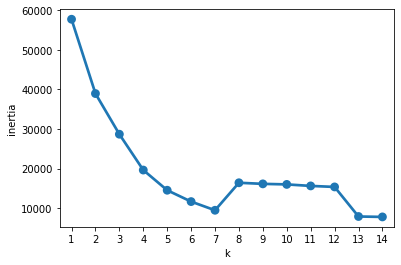

In [236]:
inertia_vs_k = sns.pointplot(data = k_vs_inertia, x="k", y="inertia")
inertia_vs_k
#el optimo de clusters podria ser 5 o 6, donde empieza el codo del grafico. Por mas que hay un salto analizamos la figura como si la linea continuase.

In [237]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
from sklearn.cluster import KMeans

In [238]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

In [239]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

In [240]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
from sklearn.cluster import KMeans

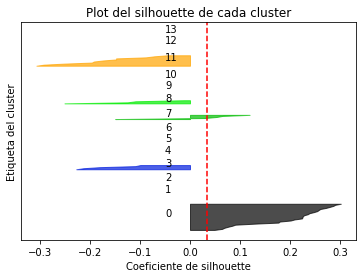

In [241]:
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

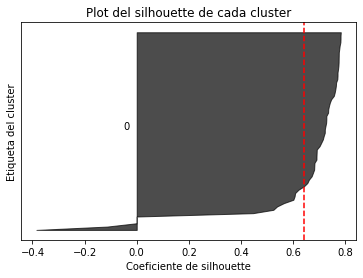

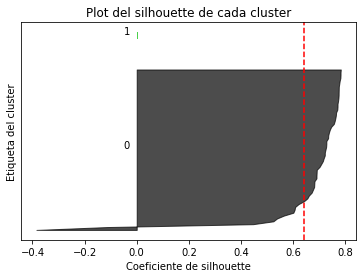

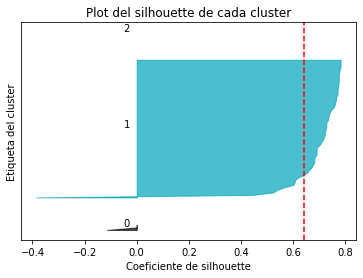

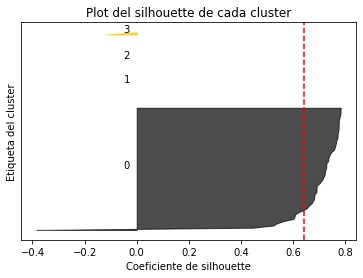

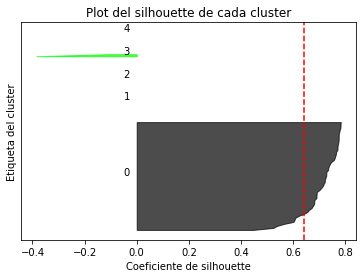

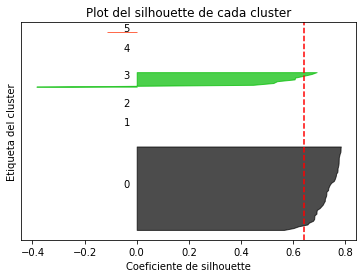

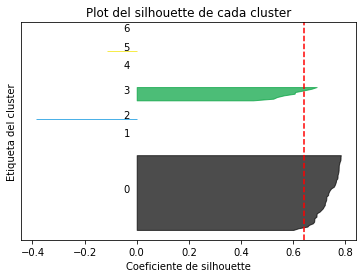

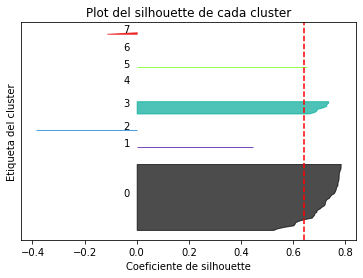

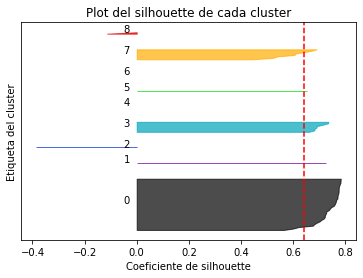

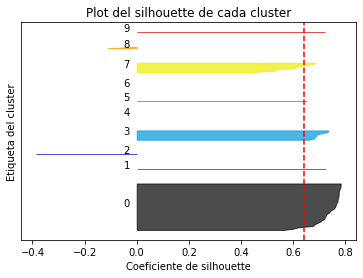

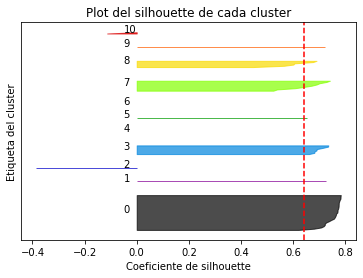

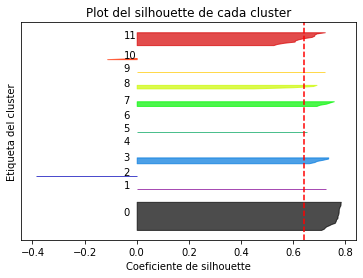

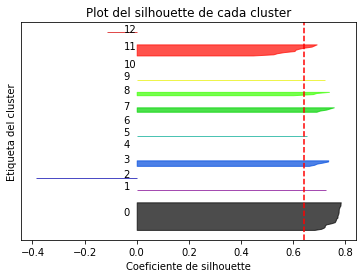

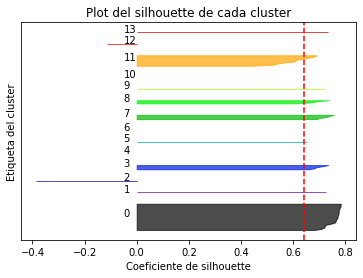

In [250]:
inertia_k = {}
valores_k = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
inertia_k["k"] = valores_k
inertia_lista = []
k = 0
while k < 14:
    k += 1 
    kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
    kmeans.fit(stock_data_normalizado) 
    kmeans.labels_
    graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

    K  SilhouettePromedio
0   2            0.762327
1   3            0.733831
2   4            0.723138
3   5            0.641044
4   6            0.327869
5   7            0.297045
6   8            0.052273
7   9            0.023028
8  10            0.006862


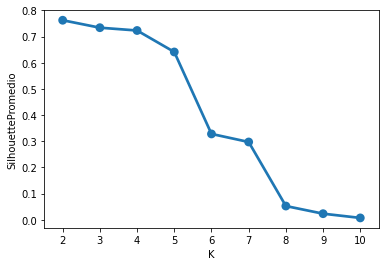

In [243]:
silhouette_avg = [] 
for k in range(2,11): #desde 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=123457)
    kmeans.fit(stock_data_normalizado)
    silhouette_avg.append(silhouette_score(stock_data_normalizado, kmeans.labels_))
df = pd.DataFrame({'K':list(range(2,11)),'SilhouettePromedio':silhouette_avg})
print(df)
g = sns.pointplot(data=df, x='K', y='SilhouettePromedio')

In [244]:
#segun este grafico, un buen numero de clusters podria ser 2,3, 4 o quizas 5.
#Vimos con kmeans que un buen numero de clusters podria ser 5 o 6
#Vimos con silhouette que un buen numero de cluster podria ser 5.
#Podemos concluir que un buen numero de clusters podria ser 5.
#Ademas si vemos los graficos de silhouette de 5 clusters vemos que es el grafico donde, una gran cantidad de datos esta del lado positivo y es de losque mas datos superan la media. Y los datos que estan pasando el 0 para el lado negativo no son tantos en comparacion a los positivos.
#Ademas se puede ver que con 1,2,3 o 4 clusters hay mas datos que estan del lado positivo que con 5 clusters, pero la cantidad de datos del lado negativo son mucho mayores que con 5 clusters.

[1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 3.98395916e-02  2.69547722e-02  1.81203449e-01 ...  1.11665445e-01
  -5.64488532e-02  5.47955158e-03]
 [ 4.49619702e-01 -3.80380844e-01 -1.30603921e+00 ... -2.51168159e+00
   6.12202625e-01 -5.74259972e+00]
 [-7.08444887e-01 -4.15444534e+00 -7.31794742e+00 ... -6.44373462e+00
  -5.24724241e-01  4.87561300e+00]
 [ 9.32846555e-02  2.69481600e+00 -5.96392543e-01 ...  1.67737718e+00
  -1.56872717e+00  4.67025326e-01]
 [-2.11892166e+00 -2.33731828e+00 -1.49417971e-01 ... -5.40937610e-01
   6.15466288e+00 -3.68439265e-01]]
C:\Users\martu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


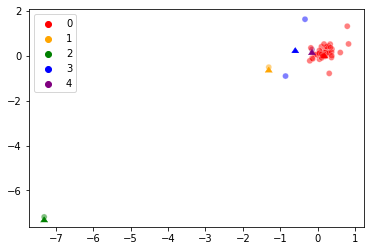

In [245]:
#con K = 5
from sklearn.cluster import KMeans
k = 5  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones.
kmeans.fit(stock_data_normalizado)  #aplicamos el método a nuestros datos. 
print(kmeans.labels_)
print(kmeans.cluster_centers_)
colores = ['red', 'orange', 'green', 'blue', 'purple']
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0,1,2,3,4], legend = False, marker=6, s=50) #el s es para el tamaño de los centroides.

In [246]:
silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

In [247]:
k = 5
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)

KMeans(init='random', n_clusters=5, random_state=123457)

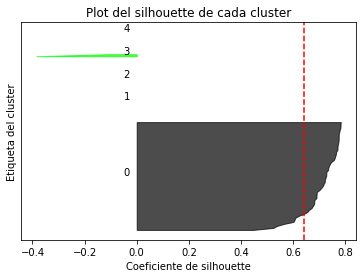

In [248]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [249]:
#g.fig.set_size_inches(15,15)